In [ ]:
pip install tensorflow


In [5]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pygame

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install sys

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sys (from versions: none)
ERROR: No matching distribution found for sys


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Dropout
#get the data and preprocess it
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [9]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
#To display the images
def showimg(i):
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    plt.show()

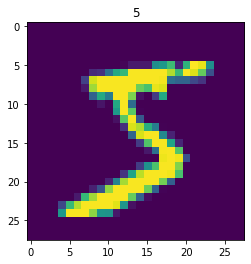

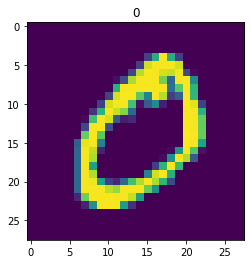

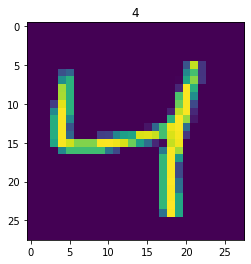

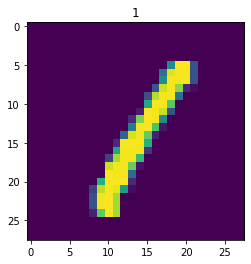

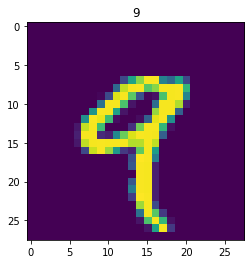

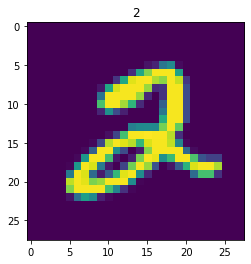

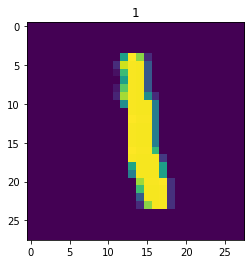

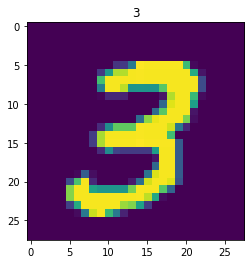

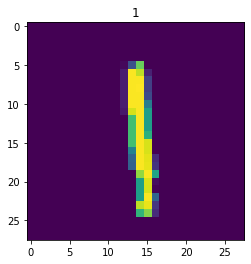

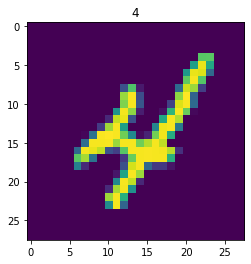

In [13]:
#print first 5 images
for i in range(10):
    showimg(i)

In [ ]:
#preprocessing
X_train=X_train.astype(np.float32)/255
X_test=X_test.astype(np.float32)/255


In [ ]:
#reshape to (28,28,1)
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

In [ ]:
X_train.shape

In [ ]:
#convert to one hot vectors
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [14]:
#building the model
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation="relu"))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10,activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [16]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
#callbacks
from keras.callbacks import EarlyStopping,ModelCheckpoint
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=4,verbose=1)
mc=ModelCheckpoint("./mymodel.h5",monitor='val_accuracy',verbose=1,save_best_only=True)
cb=[es,mc]

In [18]:
his=model.fit(X_train,y_train,epochs=50,validation_split=0.3,callbacks=cb)

Epoch 1/50
1310/1313 [============================>.] - ETA: 0s - loss: 0.2092 - accuracy: 0.9379
Epoch 1: val_accuracy improved from -inf to 0.97639, saving model to .\mymodel.h5
1313/1313 [==============================] - 20s 15ms/step - loss: 0.2089 - accuracy: 0.9380 - val_loss: 0.0767 - val_accuracy: 0.9764
Epoch 2/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0711 - accuracy: 0.9779
Epoch 2: val_accuracy improved from 0.97639 to 0.98383, saving model to .\mymodel.h5
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0711 - accuracy: 0.9779 - val_loss: 0.0540 - val_accuracy: 0.9838
Epoch 3/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0528 - accuracy: 0.9838
Epoch 3: val_accuracy improved from 0.98383 to 0.98461, saving model to .\mymodel.h5
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0528 - accuracy: 0.9838 - val_loss: 0.0491 - val_accuracy: 0.9846
Epoch 4/50
1313/1313 [===========================

In [ ]:
model.save('mymodel.h5')

In [ ]:
import os
os.getcwd()
model1=keras.models.load_model("mymodel.h5")

In [ ]:
score=model1.evaluate(X_test,y_test)
print(score)
plt.imshow(X_test[0])

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
# Load the custom input image using OpenCV
input_image = cv2.imread("4937.png", cv2.IMREAD_GRAYSCALE)

 #Resize the image to match the MNIST input shape (28x28 pixels)
resized_image = cv2.resize(input_image, (28, 28))
#cv2.imshow('',resized_image)
#cv2.waitKey(0)
# Invert the image (if needed) to match the MNIST dataset convention
#inverted_image = cv2.bitwise_not(resized_image)

# Normalize the pixel values between 0 and 1
normalized_image = resized_image.astype('float32') / 255.0
normalized_image = cv2.threshold(normalized_image, 0.1, 1, cv2.THRESH_BINARY_INV)[1]

# Reshape the image to match the input shape of the model (batch_size, height, width, channels)
input_data = np.reshape(normalized_image, (1, 28, 28, 1))
model = tf.keras.models.load_model("mymodel.h5")  # Replace with the path to your actual model file

# Make predictions on the custom input data
predictions = model.predict(input_data)

# Get the predicted class (digit) by finding the index with the highest probability
predicted_class = np.argmax(predictions)

# Print the predicted class
print("Predicted class:", predicted_class)

In [5]:
import pygame, sys
from pygame.locals import *
import numpy as np
from keras.models import load_model
import cv2
WINDOWSIZEX = 640
WINDOWSIZEY = 480
BOUNDARYINC=5
image_cnt=1
PREDICT=True
WHITE=(255,255,255)
BLACK=(0,0,0)
RED=(255,0,0)
IMAGESAVE=False
MODEL=load_model("mymodel.h5")
LABELS={0:"zero",1:"one",2:"two",3:"three",4:"four",5:"five",6:"six",7:"seven",8:"eight",9:"nine"}
pygame.init()
FONT= pygame.font.Font(None,18)

DISPLAYSURF=pygame.display.set_mode((WINDOWSIZEX, WINDOWSIZEY))
pygame.display.set_caption(" ---DIGIT BOARD---")
iswriting=False
number_xcord=[]
number_ycord=[]
while True:
    for event in pygame.event.get():
        if event.type==QUIT:
            pygame.quit()
            sys.exit()
        if event.type==MOUSEMOTION and iswriting:
            xcord,ycord=event.pos
            pygame.draw.circle(DISPLAYSURF,WHITE,(xcord,ycord),4,0)
            number_xcord.append(xcord)
            number_ycord.append(ycord)
        if event.type==MOUSEBUTTONDOWN:
            iswriting=True
        if event.type==MOUSEBUTTONUP:
            iswriting=False
            number_xcord=sorted(number_xcord)
            number_ycord=sorted(number_ycord)
            rect_min_x,rect_max_x=max(number_xcord[0]-BOUNDARYINC,0),min(WINDOWSIZEX,number_xcord[-1]+BOUNDARYINC)
            rect_min_Y,rect_max_Y=max(number_ycord[0]-BOUNDARYINC,0),min(number_ycord[-1]+BOUNDARYINC,WINDOWSIZEX)
            number_xcord=[]
            number_ycord=[]
            img_arr=np.array(pygame.PixelArray(DISPLAYSURF))[rect_min_x:rect_max_x,rect_min_Y:rect_max_Y].T.astype(np.float32)
            if IMAGESAVE:
                cv2.imwrite("image.png")
                image_cnt+=1
            if PREDICT:
                image=cv2.resize(img_arr,(28,28))
                image=np.pad(image,(10,10),'constant',constant_values=0)
                image=cv2.resize(image,(28,28))/255
                label=str(LABELS[np.argmax(MODEL.predict(image.reshape(1,28,28,1)))])
                textSurface=FONT.render(label,True,RED,WHITE)
                textRecObj=textSurface.get_rect()
                textRecObj.left,textRecObj.bottom=rect_min_x,rect_max_Y
                DISPLAYSURF.blit(textSurface,textRecObj)
            if event.type==KEYDOWN:
                if event.unicode=="n":
                    DISPLAYSURF.fill(BLACK)
        pygame.display.update()
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 17ms/step


SystemExit: 